In [13]:
# this is an input-output file, which takes the fits file as an input and gives us a white image of the data cube by suming all the values of the wavelength axis
# importing the required libraries
from musetools import io as io
import matplotlib.pyplot as plt
from musetools import spec as s
import numpy as np
import getpass
from astropy.convolution import Gaussian2DKernel, convolve
from matplotlib import mlab, cm
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.wcs import WCS
from importlib import reload
reload(io)

from copy import deepcopy

%matplotlib inline
username=getpass.getuser()

if username == 'bordoloi':
	fitsfile = '/Users/bordoloi/Dropbox/MUSE/LensedArc/RCS0327_16mc_zap.fits'
else:
	fitsfile = '/home/ahmed/astro/data/RCS0327_16mc_zap.fits'
#input("Enter the path to your file: ")


wave, data, var, header = io.open_muse_cube(fitsfile)
#print(header)
w = WCS(header)
print(w)
print( 3600*proj_plane_pixel_scales(w))
zgal= 1.7037455
wrest = wave/(1.+zgal)

#spec, spec_err = s.extract_square(115, 237, wave, data, var, 5)
minwave = 7558.4#7090.     #7090.       #7555.
maxwave = 7563.7#7110.     #7110.       #7573.
ems_image = io.narrow_band(minwave, maxwave, wave, data,plot=False)
white = io.wl_image(wave, data)
cont_min = 7645.#6930.
cont_max = 7650.3#6950.
cont_image = io.narrow_band(cont_min, cont_max, wave, data,plot=False)


wl_min = 6500.#6930.
wl_max = 8500.5#6950.
wl_image = io.narrow_band(wl_min, wl_max, wave, data,plot=False)


residual_image=ems_image-cont_image
#residual_SB = residual_image * 10.**(-20.)*(maxwave-minwave) / (0.2)**2.
#factor = 10.**(-20.)*(maxwave-minwave) / (0.2)**2.

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  ''  
CRVAL : 51.86375  -13.44119  0.0  
CRPIX : 193.888265349788  153.554162569376  0.0  
CD1_1 CD1_2 CD1_3  : -5.55555555555556e-05  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  5.55555555555556e-05  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.0  
NAXIS : 352  349
[2.0e-01 2.0e-01 3.6e+03]


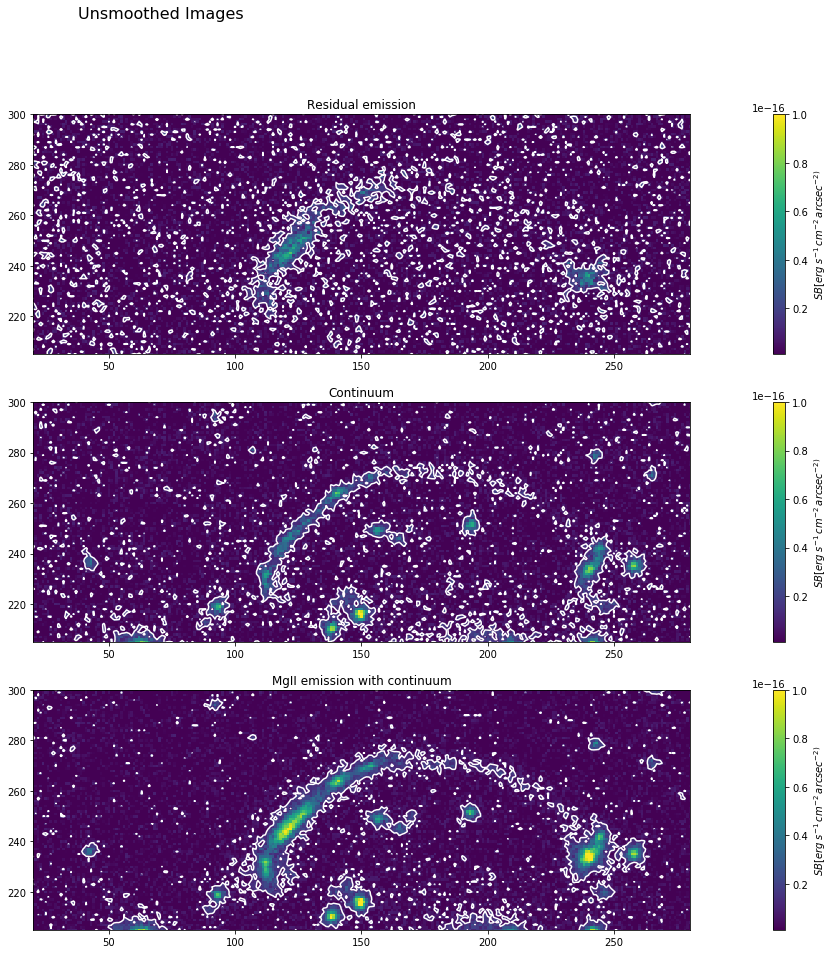

'\nThe z stretching for the color map\n'

In [9]:
'''
The z stretching for the color map
'''

zmin=1e-18
zmax=1e-16

width_in = 10
fig=plt.figure(1)
fig.suptitle('Unsmoothed Images',fontsize=16)
ax = fig.add_subplot(311)
#fig, ax = plt.subplots(3)
#width_in = 30
#fig.figsize=(width_in, 15)
fig.set_figheight(15)
fig.set_figwidth(30)
im = ax.imshow( residual_image, cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#ax.contour(ems_image-cont_image,levels=(1e-17,1e-16),colors='black')
ax.contour(residual_image,levels=[1e-17],colors='white')
ax.set_title('Residual emission')
ax.set_ylim([205,300])
ax.set_xlim([20,280])
'''
ax1 = fig.add_subplot(312)
ax1.imshow(np.log10(np.abs(residual_SB)), cmap = plt.get_cmap('viridis'), origin='lower', vmin =zmin, vmax = zmax)
ax1.set_title('Continuum')
ax1.set_ylim([205,300])
ax1.set_xlim([20,280])
'''
ax2 = fig.add_subplot(312)
im2 =ax2.imshow(cont_image , cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im2,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax2.contour(cont_image,levels=[1e-17],colors='white')
ax2.set_title('Continuum')
ax2.set_ylim([205,300])
ax2.set_xlim([20,280])



ax3 = fig.add_subplot(313)
im3 = ax3.imshow(ems_image, cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im3,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax3.contour(ems_image,levels=[1e-17],colors='white')
ax3.set_title('MgII emission with continuum')
ax3.set_ylim([205,300])
ax3.set_xlim([20,280])
fig.savefig('/home/ahmed/astro/figures/emission_maps/MgII_emissionmap_unsmooth.pdf')
plt.show()

#fig = plt.figure()
'''
The z stretching for the color map
'''

(20, 280)

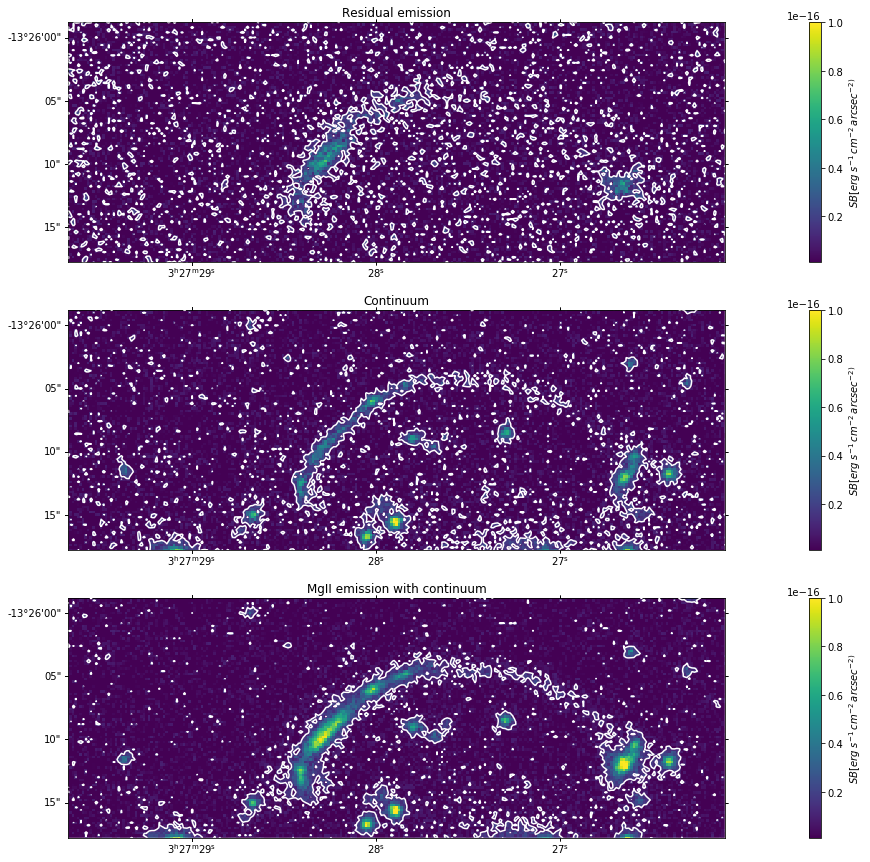

In [20]:
### Plotting using the right ascension and Declination
wcs = WCS(header).celestial

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(30)
ax1 = plt.subplot(311, projection=wcs)
im = ax1.imshow( residual_image, cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#ax.contour(ems_image-cont_image,levels=(1e-17,1e-16),colors='black')
ax1.contour(residual_image,levels=[1e-17],colors='white')
ax1.set_title('Residual emission')
ax1.set_ylim([205,300])
ax1.set_xlim([20,280])

ax2 = plt.subplot(312, projection=wcs)
im2 =ax2.imshow(cont_image , cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im2,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax2.contour(cont_image,levels=[1e-17],colors='white')
ax2.set_title('Continuum')
ax2.set_ylim([205,300])
ax2.set_xlim([20,280])

ax3 = plt.subplot(313, projection=wcs)
im3 = ax3.imshow(ems_image, cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im3,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax3.contour(ems_image,levels=[1e-17],colors='white')
ax3.set_title('MgII emission with continuum')
ax3.set_ylim([205,300])
ax3.set_xlim([20,280])


In [21]:
def convolve_image(image,stdev=1.):
   # We smooth with a Gaussian kernel with stddev=2
   # It is a 9x9 array
   kernel = Gaussian2DKernel(x_stddev=stdev)
   # create a "fixed" image with NaNs replaced by interpolated values
   # astropy's convolution replaces the NaN pixels with a kernel-weighted
   # interpolation from their neighbors
   astropy_conv = convolve(image, kernel)
   mean_val=(np.mean(astropy_conv))
   std_val=(np.std(astropy_conv))
   sig_threshold=3.

   qq=np.where((astropy_conv < sig_threshold*std_val))
   qq_complement=np.where((astropy_conv >= sig_threshold*std_val))

   ROI=deepcopy(astropy_conv)
   ROI[qq]= 0.

   #Now create a mask

   Mask=deepcopy(astropy_conv)
   Mask[qq_complement]=1.
   Mask[qq]=0.

   final_image= astropy_conv*Mask

   return final_image,astropy_conv

/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


(20, 280)

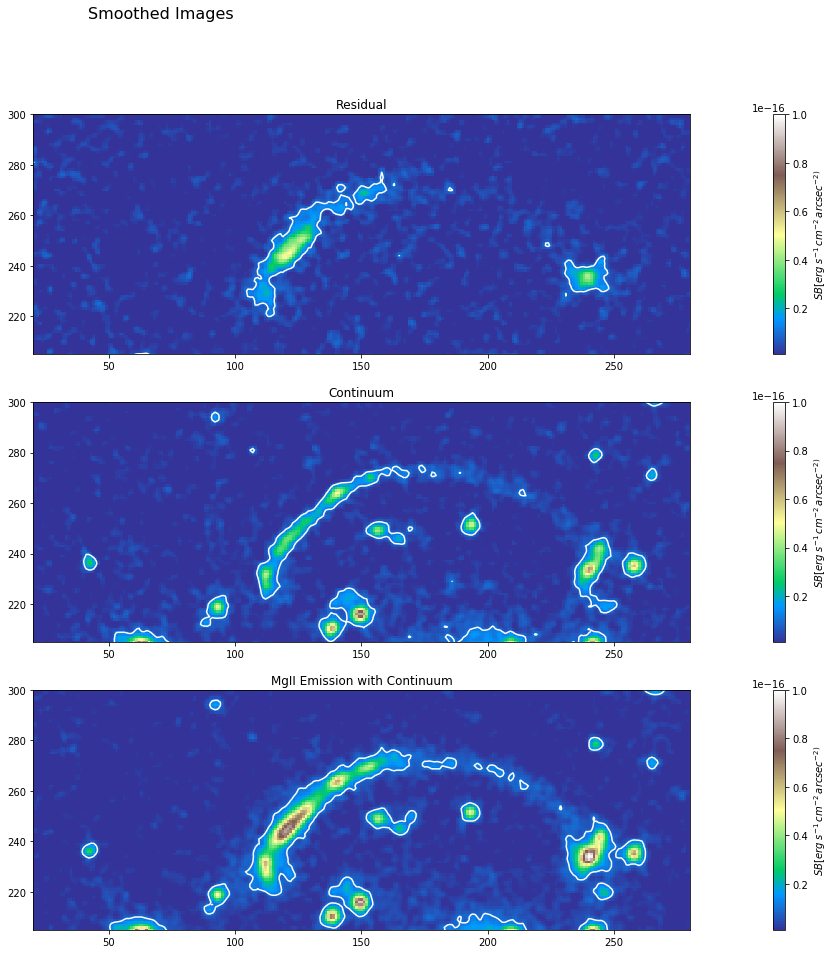

In [23]:
final_im,conv_im=convolve_image(residual_image)
final_cont,conv_cont = convolve_image(cont_image)
final_ems,conv_ems = convolve_image(ems_image)
fig, ax = plt.subplots(3,figsize=(30,15))
fig.suptitle('Smoothed Images',fontsize=16)
im = ax[0].imshow(conv_im, cmap=plt.get_cmap('terrain'),origin='lower',vmin=zmin, vmax=zmax)
ax[0].contour(conv_im,levels=[1e-17],colors='white')
fig.colorbar(im, ax=ax[0],label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax[0].set_title('Residual')
ax[0].set_ylim([205,300])
ax[0].set_xlim([20,280])

im1 = ax[1].imshow(conv_cont, cmap=plt.get_cmap('terrain'),origin='lower',vmin=zmin, vmax=zmax)
ax[1].contour(conv_cont,levels=[1e-17],colors='white')
fig.colorbar(im1, ax=ax[1],label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax[1].set_title('Continuum')
ax[1].set_ylim([205,300])
ax[1].set_xlim([20,280])

im2 = ax[2].imshow(conv_ems, cmap=plt.get_cmap('terrain'),origin='lower',vmin=zmin, vmax=zmax)
ax[2].contour(conv_ems,levels=[1e-17],colors='white')
fig.colorbar(im2,ax=ax[2],label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax[2].set_title('MgII Emission with Continuum')
ax[2].set_ylim([205,300])
ax[2].set_xlim([20,280])

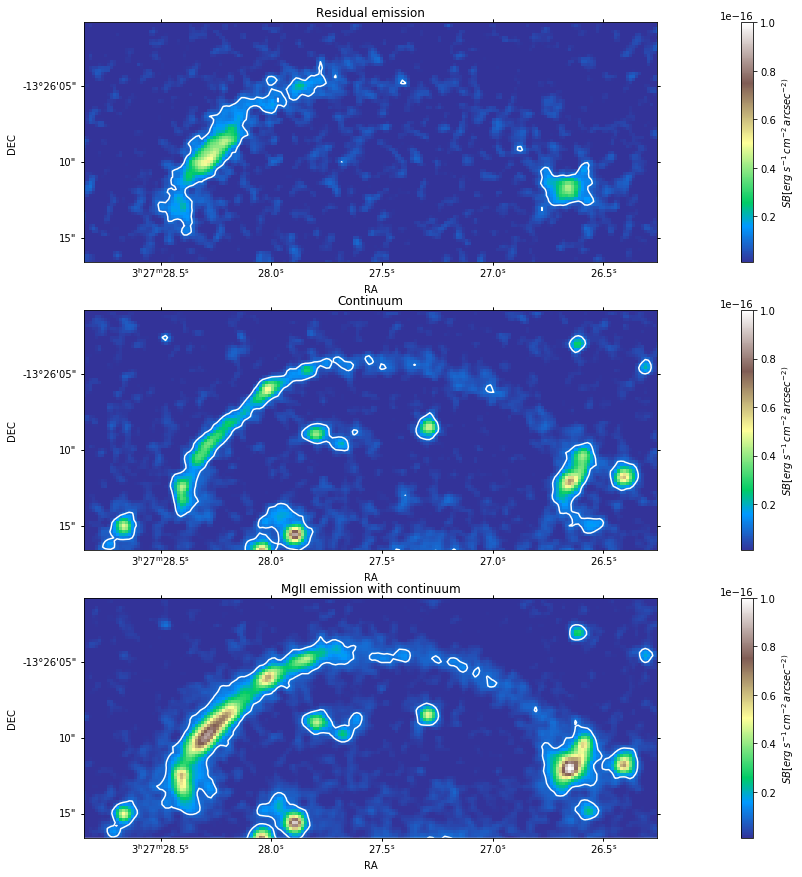

In [36]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(30)
ax1 = plt.subplot(311, projection=wcs)
im = ax1.imshow(mask*conv_im, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#ax.contour(ems_image-cont_image,levels=(1e-17,1e-16),colors='black')
ax1.contour(conv_im,levels=[1e-17],colors='white')
ax1.set_title('Residual emission')
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
ax1.set_ylim([211,290])
ax1.set_xlim([80,269])

ax2 = plt.subplot(312, projection=wcs)
im2 =ax2.imshow(mask*conv_cont , cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im2,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax2.contour(conv_cont,levels=[1e-17],colors='white')
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')
ax2.set_title('Continuum')
ax2.set_ylim([211,290])
ax2.set_xlim([80,269])

ax3 = plt.subplot(313, projection=wcs)
im3 = ax3.imshow(mask*conv_ems, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im3,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax3.contour(conv_ems,levels=[1e-17],colors='white')
ax3.set_title('MgII emission with continuum')
ax3.set_xlabel('RA')
ax3.set_ylabel('DEC')
ax3.set_ylim([211,290])
ax3.set_xlim([80,269])
fig.savefig('/home/ahmed/astro/figures/emission_maps/MgII_emissionmap_smooth_RA_DEC.pdf')


/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


(20, 280)

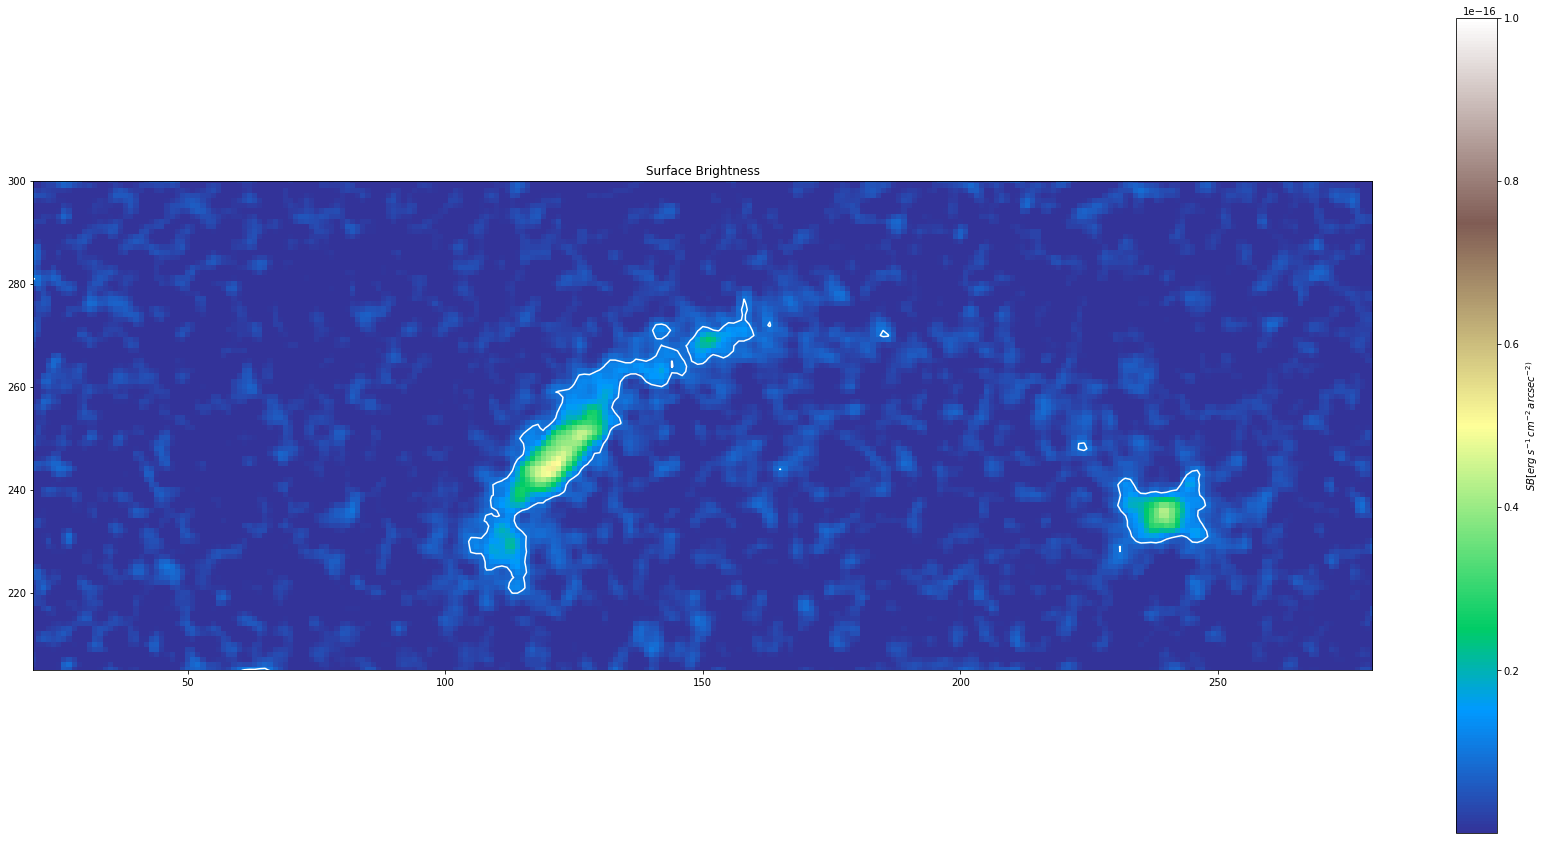

In [27]:


final_im,conv_im=convolve_image(residual_image)
width_in = 30
fig, ax = plt.subplots(figsize=(width_in, 15))
#fig.figure(1, figsize=(width_in, 15))

im=ax.imshow(conv_im, cmap = plt.get_cmap('terrain'), origin='lower',vmin=1e-20,vmax=1e-16)
ax.contour(conv_im,levels=(1e-17,1e-16),colors='white')#,vmin=-1, vmax=10)
fig.colorbar(im,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#print(residual_SB)
#residual_SB = np.matrix(residual_SB)
#print(residual_SB.min())
ax.set_title('Surface Brightness')
ax.set_ylim([205,300])
ax.set_xlim([20,280])



In [28]:
q=np.isnan(residual_image)
residual_image[q]=0
mask = 0.*residual_image

print(mask[0,0])


mask[210:290,80:270] = 1.




0.0


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(80, 270)

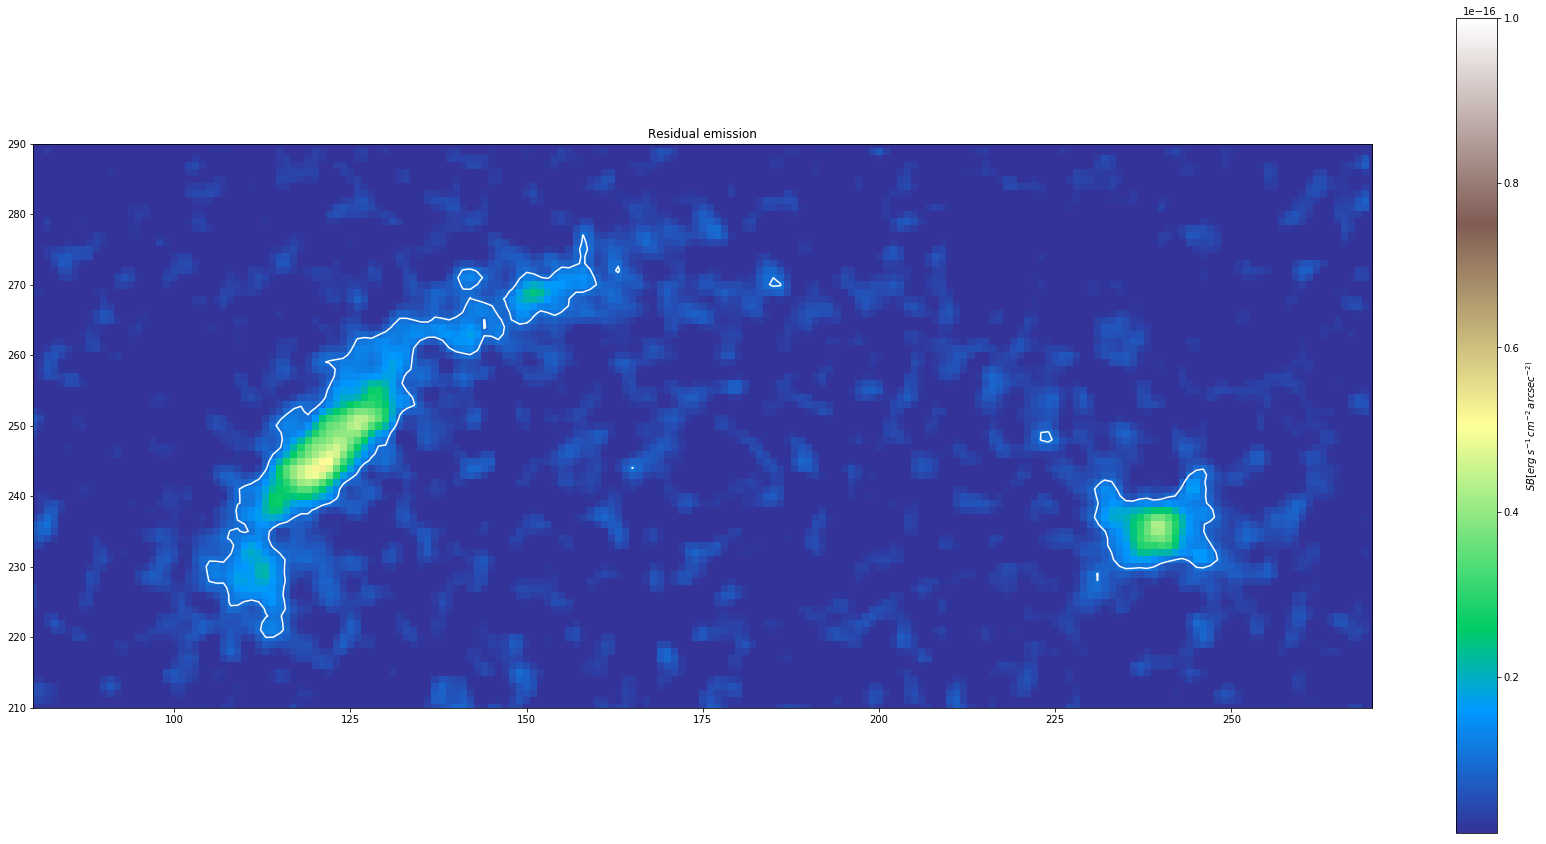

In [29]:
width_in = 30
mask_residual_image = mask*conv_im
print(mask_residual_image)
fig=plt.figure(1, figsize=(width_in, 15))
ax = fig.add_subplot(111)
im = ax.imshow(mask_residual_image, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im,label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax.contour(mask_residual_image,levels=[1e-17],colors='white')
#ax.contour(mask_residual_image,levels=np.logspace(0.6,3,3),colors='black')
ax.set_title('Residual emission')
ax.set_ylim([210,290])
ax.set_xlim([80,270])

10
[[ 51.86831316 -13.43744557]
 [ 51.86825604 -13.43744436]
 [ 51.86825242 -13.43744297]
 [ 51.86819892 -13.43741316]
 [ 51.86817182 -13.43738741]
 [ 51.86817566 -13.43733186]
 [ 51.86818762 -13.4372763 ]
 [ 51.86815505 -13.43722075]
 [ 51.8681619  -13.43716519]
 [ 51.86817345 -13.43710964]
 [ 51.86816706 -13.43705408]
 [ 51.86815534 -13.43699853]
 [ 51.86816246 -13.43694297]
 [ 51.86816156 -13.43688742]
 [ 51.86815791 -13.43683186]
 [ 51.86819891 -13.43678415]
 [ 51.86820787 -13.4367763 ]
 [ 51.86825602 -13.43673639]
 [ 51.86826834 -13.43672075]
 [ 51.86829131 -13.43666519]
 [ 51.86828393 -13.43660964]
 [ 51.86825602 -13.43658283]
 [ 51.86820736 -13.43655408]
 [ 51.8681989  -13.43655096]
 [ 51.86814178 -13.43653581]
 [ 51.86808466 -13.43650025]
 [ 51.86808187 -13.43649853]
 [ 51.86802754 -13.43647161]
 [ 51.86797042 -13.4364708 ]
 [ 51.86793962 -13.43644297]
 [ 51.8679133  -13.43643286]
 [ 51.86785619 -13.43640492]
 [ 51.86779907 -13.43638873]
 [ 51.86779425 -13.43638742]
 [ 51.86774

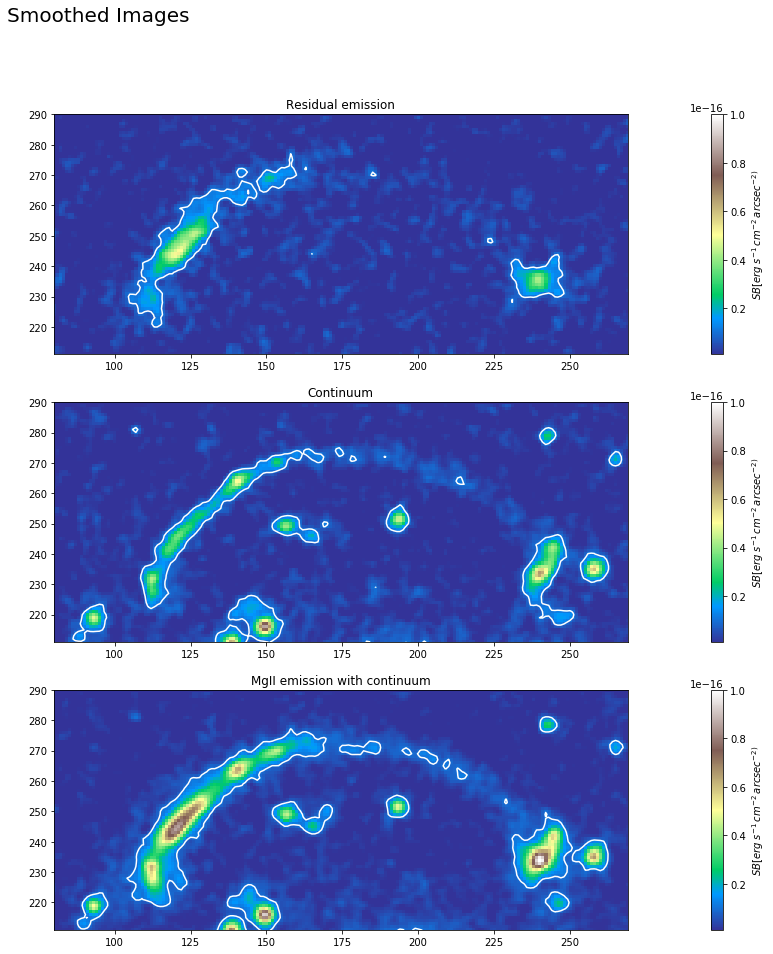

In [9]:
width_in = 30
fig=plt.figure(1, figsize=(width_in, 15))
fig.suptitle('Smoothed Images',fontsize='20')
ax = fig.add_subplot(311)
im = ax.imshow( mask_residual_image, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
fig.colorbar(im, label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#ax.contour(mask_residual_image,levels=[1e-17],color='white')
ax.set_title('Residual emission')
ax.set_ylim([211,290])
ax.set_xlim([80,269])
CS = plt.contour(mask_residual_image,levels=[1e-17],colors='white')
print(len(CS.collections[0].get_paths()))
x = []
y = []
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.table import Table
w = WCS(header)
file = open('/home/ahmed/astro/spectra/contours.txt','a')
for i in range(len(CS.collections[0].get_paths())):
    p = CS.collections[0].get_paths()[i]
    v = p.vertices
    #print(v)
    for cx, cy in zip(v[:,0],v[:,1]):
        c=w.pixel_to_world_values(cx, cy, 0)
        x.append(c[0])
        y.append(c[1])
    ascii.write([x, y], '/home/ahmed/hst/obs/cont_cord_'+str(i)+'.dat', names=['RA', 'Dec'],overwrite=True)
    # The previous line saves each contour coordinates in separate file as a table
    # The next few lines write all the contours coordinates in one text file opened before these two for loops
    contour = np.column_stack((x,y))
    file.write('\n'+str(contour))
    file.write('\n'+'________________')
    print(contour)
    print('_______')
    x = []
    y = []
file.close()

#print(x)
#print(y)
ax1 = fig.add_subplot(312)
im1 =ax1.imshow(mask*conv_cont, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
ax1.contour(mask*conv_cont,levels=[1e-17],colors='white')
fig.colorbar(im1, label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax1.set_title('Continuum')
ax1.set_ylim([211,290])
ax1.set_xlim([80,269])



ax2 = fig.add_subplot(313)
im2 = ax2.imshow(mask*conv_ems, cmap = plt.get_cmap('terrain'), origin='lower',vmin=zmin, vmax=zmax)
ax2.contour(mask*conv_ems,levels=[1e-17],colors='white')
fig.colorbar(im2, label =r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
#cbar.set_label(r'$SB[erg\/ \/s^{-1}\/cm^{-2} \/arcsec^{-2)}$')
ax2.set_title('MgII emission with continuum')
ax2.set_ylim([211,290])
ax2.set_xlim([80,269])
fig.savefig('/home/ahmed/astro/figures/emission_maps/MgII_emissionmap_smooth.pdf')
plt.show()

In [9]:
aa = deepcopy(wl_image[210:290,80:270])

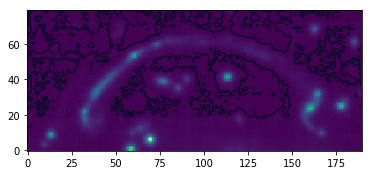

In [29]:
plt.imshow(aa, cmap=plt.get_cmap('viridis'), origin ='lower',vmin=0,vmax=1.83e-11)
#print(aa.min())
#print(aa.max())
zscale=[0.,1.8e-11]
ydim, xdim = aa.shape
x = np.arange(0., xdim, 1.)
y = np.arange(0., ydim, 1.)
X, Y = np.meshgrid(x, y)
levels = 0. + np.arange(1e-17,1e-11, 10)
norm = cm.colors.Normalize(vmax=aa.max(), vmin=aa.min())
CS = plt.contour(X,Y, aa, zscale, norm=norm, cmap='magma')

(array([33., 47., 33., 24., 17., 15.,  8.,  4.,  4.,  5.]),
 array([-4.39507778e-13,  1.09953080e-11,  2.24301237e-11,  3.38649421e-11,
         4.52997570e-11,  5.67345719e-11,  6.81693868e-11,  7.96042052e-11,
         9.10390235e-11,  1.02473835e-10,  1.13908653e-10], dtype=float32),
 <a list of 10 Patch objects>)

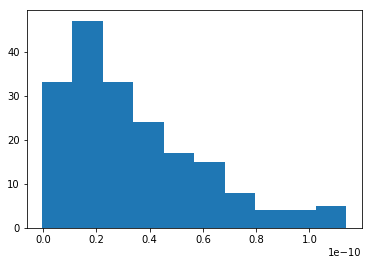

In [30]:
plt.hist(np.sum(aa, axis=0))

In [31]:
print(np.max(np.max(aa)))

1.8214937e-11


Text(0, 0.5, 'SB')

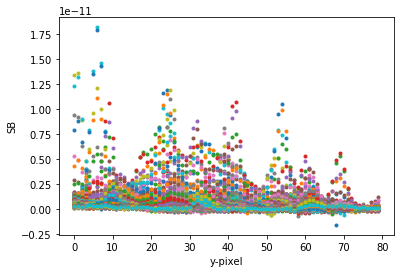

In [38]:
for i in range(0,190):
    plt.plot(aa[:,i],'.')
plt.xlabel('y-pixel')
plt.ylabel('SB')

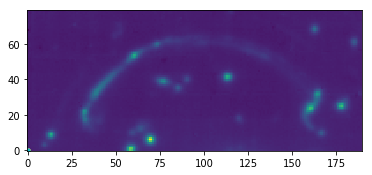

In [42]:
plt.imshow(aa, cmap = plt.get_cmap('viridis'), origin='lower')#,vmin=1,vmax=60)

for i in range(0,190):
    plt.plot(np.mean(aa[:,i]),'.')

In [43]:
from astropy.io import fits
hdu = fits.PrimaryHDU(aa)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ahmed/new.fits')

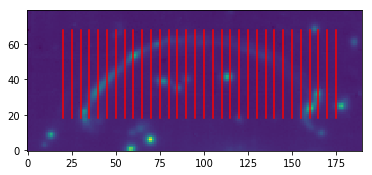

In [46]:
xgrid = np.arange(20,180,5)
plt.imshow(aa, cmap= plt.get_cmap('viridis'),origin='lower')
for i in xgrid:
    plt.plot([i,i],[18,68],'r-')

In [53]:
def trace_image(image,xgrid):
    for i in range(1,len(xgrid)):
        q = image[18:68,xgrid[i-1]:xgrid[i]]
        plt.plot(np.sum(q,axis=1),'.')
        tq = np.sum(q, axis=1)
        #print(tq)

ygrid = np.arange(0,30,1)
#len(tq)

(array([38]),)


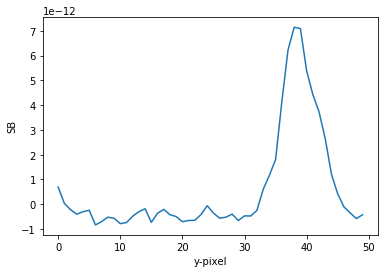

In [51]:
i = 22
q = aa[18:68,xgrid[i-1]:xgrid[i]]
tq = np.sum(q,axis=1)

plt.plot(tq)
plt.ylabel('SB')
plt.xlabel('y-pixel')
qq = np.where(tq == np.max(tq))
print(qq)

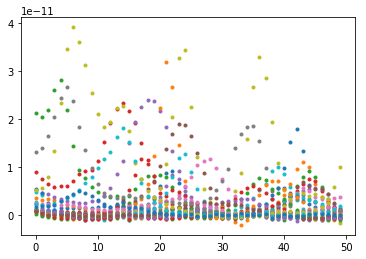

In [55]:
trace_image(aa, xgrid)

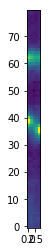

In [62]:
i = 13
q = aa[:,xgrid[i-1]:xgrid[i]]
plt.imshow(q,origin='lower')

In [63]:
ymin_lin = np.ones((len(xgrid,)))
p = -20
k = 100
h = 60
ymin = 55+-0.01* (xgrid - 100)**2 # How did we get this parpola equation
ymin[ymin<0] = 20

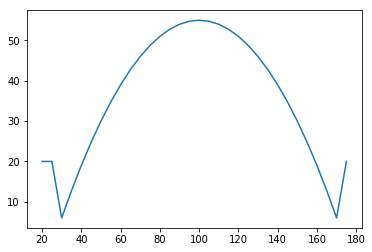

In [64]:
plt.plot(xgrid,ymin)

(0, 100)

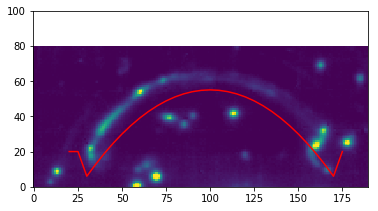

In [69]:
plt.imshow(aa, cmap = plt.get_cmap('viridis'),origin='lower',vmin=1e-18,vmax=1e-11)
plt.plot(xgrid,ymin,'r')
plt.ylim([0,100])

In [70]:
import random
import numpy as np
a = [random.random() for i in range(20)]
# find the median index of a
medIdx = a.index(np.percentile(a, 50, interpolation='nearest'))

In [71]:
medIdx

6

In [72]:
a

[0.8742716704402117,
 0.9672129125746214,
 0.1326068783945371,
 0.030864201142987602,
 0.6962734516043161,
 0.017553333477365873,
 0.54150140494229,
 0.4268346990156082,
 0.2533170416446583,
 0.03708258541570497,
 0.9405822099809575,
 0.6303791123271774,
 0.39096214203071666,
 0.38940167283447924,
 0.8167104889830403,
 0.5783511389886246,
 0.7875548895605867,
 0.7049722043922739,
 0.33296634813778747,
 0.46339734616204065]

In [73]:
from matplotlib.path import Path
import numpy as np
tupVerts=[(86, 52), (85, 52), (81, 53), (80, 52), (79, 48), (81, 49), (86, 53),
 (85, 51), (82, 54), (84, 54), (83, 49), (81, 52), (80, 50), (81, 48),
 (85, 50), (86, 54), (85, 54), (80, 48), (79, 50), (85, 49), (80, 51),
 (85, 53), (82, 49), (83, 54), (82, 53), (84, 49), (79, 49)]



x, y = np.meshgrid(np.arange(300), np.arange(300))
# make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T

p = Path(tupVerts)  # make a polygon
grid = p.contains_points(points)
mask = grid.reshape(300,300)


(40, 100)

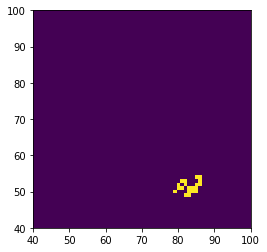

In [78]:
plt.imshow(mask,origin='lower')
plt.ylim([40,100])
plt.xlim([40,100])